In [1]:
import os
import json
import matplotlib.pyplot as plt

def find_result_json(model_path):
    """ Durchsucht das Modellverzeichnis nach einer 'result.json'-Datei """
    for root, _, files in os.walk(model_path):
        if "result.json" in files:
            return os.path.join(root, "result.json")
    return None

def parse_json_results(json_path):
    """ Liest und verarbeitet die Trainingsdaten aus der JSON-Datei """
    with open(json_path, 'r') as f:
        lines = f.readlines()
    
    # JSON Zeilen parsen
    results = [json.loads(line) for line in lines]
    
    # Extrahiere relevante Metriken
    epochs = [r["training_iteration"] for r in results]
    train_loss = [r["loss"] for r in results]
    val_loss = [r["val_loss"] for r in results]
    train_acc = [r["train_acc"] for r in results]
    val_acc = [r["val_acc"] for r in results]
    
    return epochs, train_loss, val_loss, train_acc, val_acc

def find_checkpoint_epochs(model_path):
    """ Sucht nach Checkpoint-Ordnern und extrahiert deren Epochennummern """
    checkpoint_epochs = []
    for root, dirs, _ in os.walk(model_path):
        for dir_name in dirs:
            if dir_name.startswith("checkpoint_"):
                epoch_num = int(dir_name.split("_")[1])
                checkpoint_epochs.append(epoch_num)
    return sorted(checkpoint_epochs)

def plot_training_results(model_path, model_name):
    """ Plottet den Trainingsverlauf für ein Modell """
    json_path = find_result_json(model_path)
    if not json_path:
        print(f"Keine result.json für {model_name} gefunden.")
        return
    
    epochs, train_loss, val_loss, train_acc, val_acc = parse_json_results(json_path)
    checkpoint_epochs = find_checkpoint_epochs(model_path)
    
    # Loss-Diagramm
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, train_loss, label="Train Loss", color='blue')
    plt.plot(epochs, val_loss, label="Validation Loss", color='orange')
    plt.scatter(checkpoint_epochs, [val_loss[e] for e in checkpoint_epochs if e < len(val_loss)],
                color='red', label="Checkpoints", zorder=3)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{model_name} - Training & Validation Loss")
    plt.legend()
    plt.show()

    # Accuracy-Diagramm
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, train_acc, label="Train Accuracy", color='blue')
    plt.plot(epochs, val_acc, label="Validation Accuracy", color='orange')
    plt.scatter(checkpoint_epochs, [val_acc[e] for e in checkpoint_epochs if e < len(val_acc)],
                color='red', label="Checkpoints", zorder=3)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title(f"{model_name} - Training & Validation Accuracy")
    plt.legend()
    plt.show()



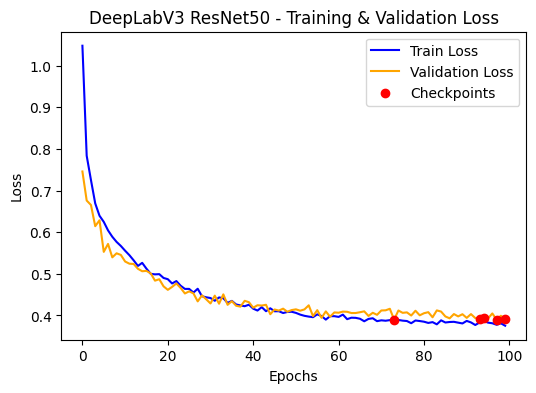

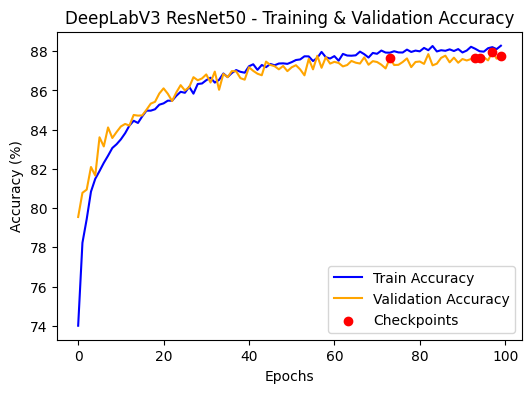

In [2]:

model_path = "HyperparameterLOG_small/deeplabv3_resnet50"
model_name = "DeepLabV3 ResNet50"
plot_training_results(model_path, model_name)

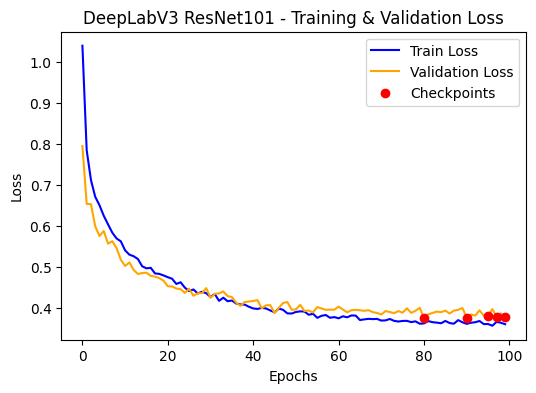

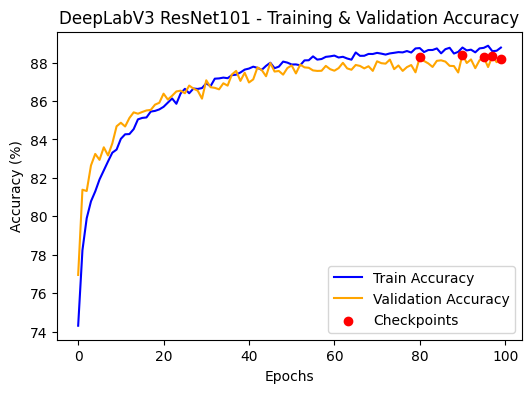

In [3]:

model_path = "HyperparameterLOG_small/deeplabv3_resnet101"
model_name = "DeepLabV3 ResNet101"
plot_training_results(model_path, model_name)


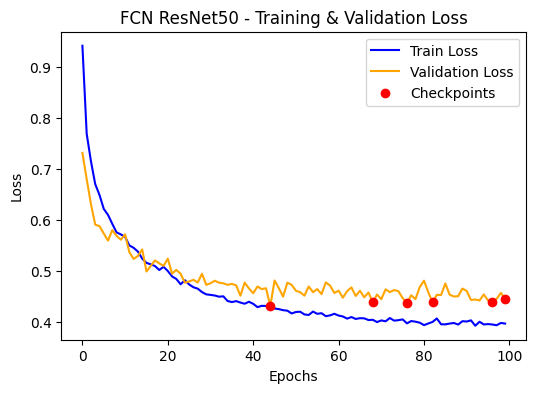

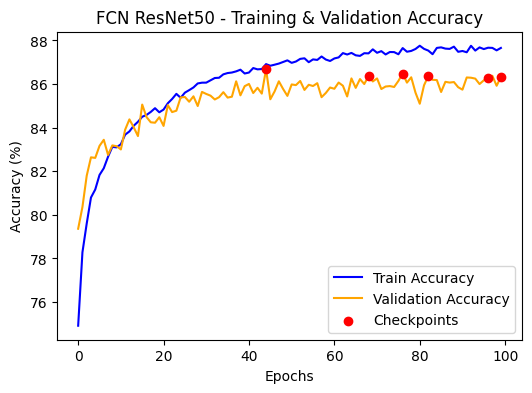

In [4]:
model_path = "HyperparameterLOG_small/fcn_resnet50"
model_name = "FCN ResNet50"
plot_training_results(model_path, model_name)

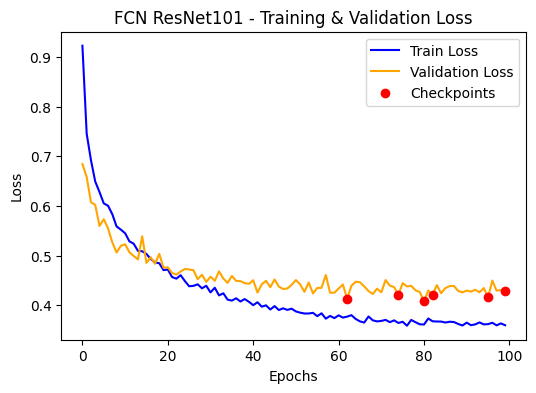

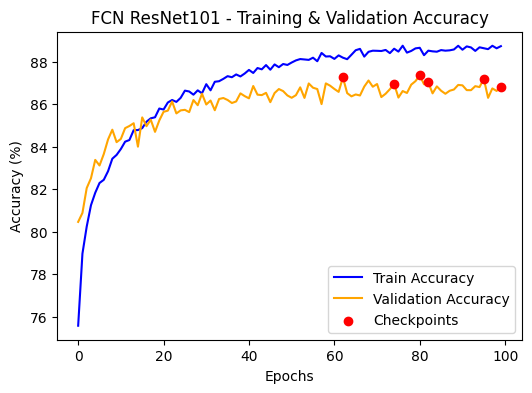

In [5]:
model_path = "HyperparameterLOG_small/fcn_resnet101"
model_name = "FCN ResNet101"
plot_training_results(model_path, model_name)